In [1]:
#Reference README.md for project proposal outline



## __ Introduction<a id='__Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

Reword add specifics about the what data it is 

### __ Recap Of Data Science Problem<a id='__Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to explore the effective strategies for distribution of the disease. As billions of people around the world are waiting to be vaccinated, the shared responsibility to deliver rest on the shoulders of ....who... Cold chain is essential for the temperature... Online biosafety rules were were governed in info on making community safer

One thing that can be done is to predict the rate of vaccination of a country based on the rate of testing(from early stage to now) of that country. Since testing and vaccination, both depend on a country's medical infrastructure it can prove a good analogy for an approximation. You can also add this as a task

### __ Introduction reword To Notebook<a id='__Introduction_To_Notebook'></a>

The limited source of data 

There is some important metadata for the data files that will be imported: 

COVID-19 World Vaccination Progress (country_vaccinations.csv)
Date Created: 2021-01-12
Last Updated: 2021-03-02
Download Date: 2021-03-02

COVID cases by Continent (folder with csv files)
Date Created: 2020-04-08
Last Updated: 2020-12-31
Download Date: 2021-03-02

Fully vaccination means 1st vaccine + rappel.

treating the data as a living document 

It is known that this is historical data and the best that we can get idea of Bayes Theorum and Frequency

**Best practice will be followed to commit changes using Git version control system***

## __ Imports<a id= '__Imports'></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np

## __ Objectives<a id='__Objectives'></a>

There are some fundamental questions to resolve in this notebook before you move on.

Do you think you may have the data you need to tackle the desired question?
Have you identified the required target value?
Do you have potentially useful features?
Do you have any fundamental issues with the data?

## __ Load The COVID cases data <a id='__Load The COVID cases data'></a>

In [3]:
#the supplied CSV file is in the raw_data directory and was uploaded from kaggle: 
#https://www.kaggle.com/gpreda/covid-world-vaccination-progress
vaccine_data = pd.read_csv('../raw_data/country_vaccinations.csv')
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4678 non-null   object 
 1   iso_code                             4366 non-null   object 
 2   date                                 4678 non-null   object 
 3   total_vaccinations                   3054 non-null   float64
 4   people_vaccinated                    2595 non-null   float64
 5   people_fully_vaccinated              1746 non-null   float64
 6   daily_vaccinations_raw               2576 non-null   float64
 7   daily_vaccinations                   4518 non-null   float64
 8   total_vaccinations_per_hundred       3054 non-null   float64
 9   people_vaccinated_per_hundred        2595 non-null   float64
 10  people_fully_vaccinated_per_hundred  1746 non-null   float64
 11  daily_vaccinations_per_million

First look at the data and we can see that there are some missing values, it looks like the total number of rows is 4678. None of the columns containing datatypes have a complete set. The closest to a complete set for data in decimals is the daily vaccinations column. There is only one column that contains object data that is not complete and that is the iso_code column. 

In [4]:
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


Looking a bit deeper, I can see that there are two columns that have daily vaccinations, one labeled daily vaccinations raw and the other daily vaccinations. This raises some questions about what exactly is being recorded. Referring back to kaggle-comments, we might be able to glean better insight into which data to keep. 

Luckily the data column definition was given for the following:

'daily_vaccinations_raw: daily change in the total number of doses administered. 

It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead.'

Upon further inspection it looks like there is a discrepency between the total number of vaccinations (3) and daily vaccinations (7) and there are not values for each day. To get a better understanding about the cummulative totals for each country we can look at the values missing for those columns. In addition, to the iso code column, as this column contians categorical information for each data point.  

In [5]:
missing_vaccine = vaccine_data[['iso_code','people_vaccinated','daily_vaccinations']].isnull().sum()
p_missing = missing_vaccine/len(vaccine_data) * 100
p_missing

iso_code               6.669517
people_vaccinated     44.527576
daily_vaccinations     3.420265
dtype: float64

Majority of the missing values are in the poeple vaccinated column and not all of the iso codes have been populated. Some of the missing iso codes are for England and it was mentioned in the kaggle-comments that the UK data has doubled, they put data from each of their nation/countries (Wales, Scotland, Ireland, and England) AND from the UK itself. We can address the duplication along with the missing values for the soveriegn state before summing all of the vaccinations. I believe the simplest solution will be to remove the iso codes for the individual regions.

In [6]:
vaccine_data = vaccine_data.set_index('country')
n_vaccine_data = vaccine_data.drop(labels=['Wales','Scotland','Northern Ireland','England']).reset_index()
n_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4366 non-null   object 
 1   iso_code                             4366 non-null   object 
 2   date                                 4366 non-null   object 
 3   total_vaccinations                   2840 non-null   float64
 4   people_vaccinated                    2381 non-null   float64
 5   people_fully_vaccinated              1544 non-null   float64
 6   daily_vaccinations_raw               2383 non-null   float64
 7   daily_vaccinations                   4210 non-null   float64
 8   total_vaccinations_per_hundred       2840 non-null   float64
 9   people_vaccinated_per_hundred        2381 non-null   float64
 10  people_fully_vaccinated_per_hundred  1544 non-null   float64
 11  daily_vaccinations_per_million

Now that we have removed the United Kingdom duplicate regions we can address the missing values for daily vaccinations by removing those rows and then insert the newly summed values to populate an accurate cumulative total for total vaccinations based on the daily vaccinations column. 

In [7]:
missing_vaccine_data = n_vaccine_data.dropna(subset=['daily_vaccinations'], inplace=True)
n_vaccine_data['total_vaccinations'] = n_vaccine_data.groupby('iso_code').daily_vaccinations.cumsum()
n_vaccine_data.head(50)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Albania,ALB,2021-01-11,64.0,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,191.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,257.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,319.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,381.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,439.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,494.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,545.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
10,Albania,ALB,2021-01-20,592.0,519.0,NaN,36.0,47.0,0.02,0.02,NaN,16.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


We have successfully removed all null vaues for daily vaccinations, around 160 rows and calculated a running total per each iso code. Comparing the total vaccinations column with the people vaccinated, there are values which are misaligned, and as we saw earlier, almost half of the data is missing from the people vaccinated column. From my understanding about the data this duplication of columns would lead to more questions than answers. Also, as mentioned before the daily vaccinations raw - was simply for data checks and transparency, most of the computation will be based off of daily vaccinations. Therefore, three columns will be removed: people vaccinated, people vaccinated per hundred and daily vaccination raw. 

In [8]:
p_vaccine_data = n_vaccine_data.drop(columns=['people_vaccinated','daily_vaccinations_raw','people_vaccinated_per_hundred'])
p_vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 1 to 4365
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              4210 non-null   object 
 1   iso_code                             4210 non-null   object 
 2   date                                 4210 non-null   object 
 3   total_vaccinations                   4210 non-null   float64
 4   people_fully_vaccinated              1538 non-null   float64
 5   daily_vaccinations                   4210 non-null   float64
 6   total_vaccinations_per_hundred       2713 non-null   float64
 7   people_fully_vaccinated_per_hundred  1538 non-null   float64
 8   daily_vaccinations_per_million       4210 non-null   float64
 9   vaccines                             4210 non-null   object 
 10  source_name                          4210 non-null   object 
 11  source_website                

A graphical representation of the miximums from the total vaccinations per country will show us how frequently the number passes one million. This will be a deciding point on whether to keep that column or remove it.

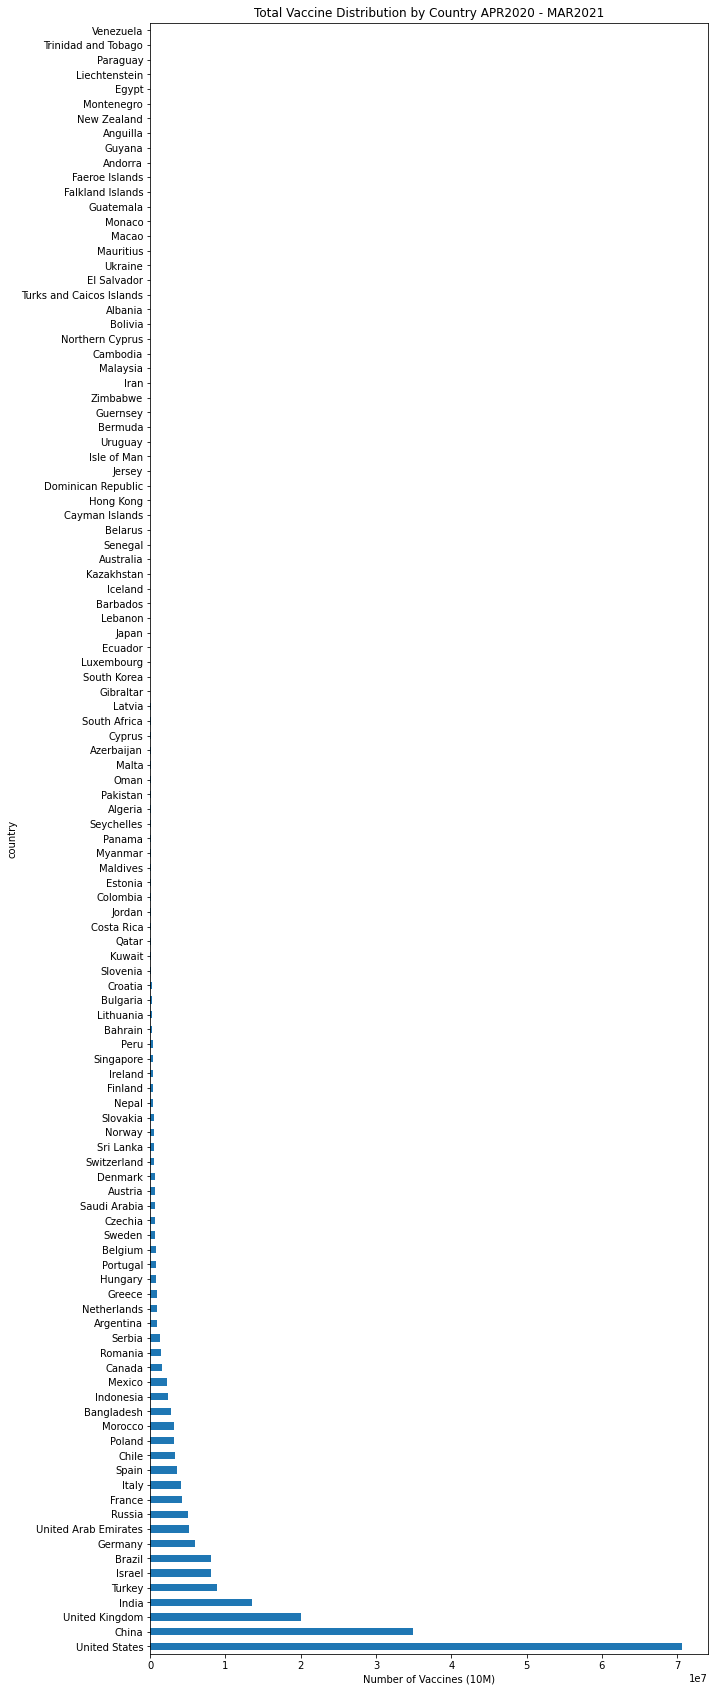

In [9]:
vaccine_max = p_vaccine_data.groupby('country')['total_vaccinations'].max()
vaccine_max
vaccine_max.sort_values(ascending=False).plot(kind='barh', figsize=(10, 30), title='Total Vaccine Distribution by Country APR2020 - MAR2021')
plt.xlabel('Number of Vaccines (10M)');

Based on the graph above there would be very few meaningfull entries for daily vaccinations in the millions. It is a very optomistic outlook, however, most of the entries would be very small and the data that is present does not appear to have values that make computational sense. We can remove the daily vaccinations per million column and calculate the new values for the total vaccinations per hundred based on the numbers that were calculated earlier for total number of vaccinations.

In [10]:
p_vaccine_data = p_vaccine_data.drop(columns=['daily_vaccinations_per_million'])
p_vaccine_data['total_vaccinations_per_hundred'] = p_vaccine_data['total_vaccinations'] / 100
p_vaccine_data['people_fully_vaccinated_per_hundred'] = p_vaccine_data['people_fully_vaccinated'] / 100
p_vaccine_data[['people_fully_vaccinated','people_fully_vaccinated_per_hundred']] = p_vaccine_data[['people_fully_vaccinated','people_fully_vaccinated_per_hundred']].fillna(0)
pop_v = p_vaccine_data.reset_index().drop(columns='index')
pop_v

,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,vaccines,source_name,source_website
0,Albania,ALB,2021-01-11,64.0,0.0,64.0,0.64,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-12,128.0,0.0,64.0,1.28,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-13,191.0,0.0,63.0,1.91,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-14,257.0,0.0,66.0,2.57,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-15,319.0,0.0,62.0,3.19,0.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...
4205,Zimbabwe,ZWE,2021-02-25,5004.0,0.0,1572.0,50.04,0.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4206,Zimbabwe,ZWE,2021-02-26,6754.0,0.0,1750.0,67.54,0.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4207,Zimbabwe,ZWE,2021-02-27,8904.0,0.0,2150.0,89.04,0.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4208,Zimbabwe,ZWE,2021-02-28,11455.0,0.0,2551.0,114.55,0.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...


Now we have a completely cleaned set of data. There is one column that we can expand and perform some metrics on, that is the vaccines. There seems to be multiple vaccines that are listed in each column. Lets find out how many of each kind have been distributed. Visualizing the data by vaccine will be easier if the vaccines are split up into separate columns.

In [11]:
#Getting unique vaccine from the vaccine column
vac_type = p_vaccine_data["vaccines"].str.split(",").explode("vaccines").unique()
vac_type_list = [x.replace(" ", '') for x in vac_type]
vac_pd = pd.DataFrame(vac_type_list).rename(columns={0:'vaccine'}).drop(index=[4,5,6,9,11]).sort_values('vaccine').reset_index()
vac_pd.drop(columns='index')

,vaccine
0,Covaxin
1,EpiVacCorona
2,Johnson&Johnson
3,Moderna
4,Oxford/AstraZeneca
5,Pfizer/BioNTech
6,Sinopharm/Beijing
7,Sinopharm/Wuhan
8,Sinovac
9,SputnikV


Visualizing the data by vaccine will be easier if the vaccines are split up into separate columns. We can see that there are 10 unique vaccines that are in circulation. We can perform value counts for each vaccine in addition to identifying vaccines per country. 

In [12]:
def get_vac(vac_str):
    cov_data = p_vaccine_data["vaccines"].str.split(',', expand=True)
    cov = cov_data.values == vac_str
    cov_df = pd.DataFrame(cov)
    c_df = cov_df.replace({True:vac_str, False:''})
    return c_df

#Covaxin
c_df = get_vac('Covaxin')
c_df.describe()

#Covaxin was administered to India with reference to the raw data - will need to verify that after the concatonation

,0,1,2,3,4
count,4210,4210,4210,4210,4210
unique,2,1,1,1,1
top,,,,,
freq,4166,4210,4210,4210,4210


I was able to get the values for covaxin using a custom function, I will have to do the same for the other columns to get the uique values at their index. 

In [13]:
#EpiVacCorona
e_df = get_vac('EpiVacCorona')
e_df.describe()

#EpiVacCorona is a Russian vaccination

,0,1,2,3,4
count,4210,4210,4210,4210,4210
unique,2,1,1,1,1
top,,,,,
freq,4134,4210,4210,4210,4210


In [14]:
#Johnson&Johnson
jnj_df = get_vac('Johnson&Johnson')
jnj_df.describe()

#Johnson&Johnson is a South Afrian vaccination

,0,1,2,3,4
count,4210,4210,4210,4210,4210
unique,2,1,1,1,1
top,,,,,
freq,4198,4210,4210,4210,4210


In [15]:
#Moderna
m_df = get_vac('Moderna')
m_df.describe()

#Moderna was administered to Austria, Belgium, Bulgaria, Canada, Czechia, Denmark, Estonia, Finland, France, Germany, Greece,
#Hungary, Iceland, Ireland, Israel, Italy, Latvia, Liechtenstein, Lithuania, Luxembourg, Netherlands, Norway, Poland, 
#Portugal, Romania, Spain, Switzerland, US

,0,1,2,3,4
count,4210,4210,4210,4210,4210
unique,2,1,1,1,1
top,,,,,
freq,2566,4210,4210,4210,4210


In [16]:
#'Oxford/AstraZeneca'

def combine_series(s1, s2, vaccine):
    not_None = lambda s1, s2: s1 if s1 == vaccine else s2
    s = s1.combine(s2, not_None)
    return s

oxas_df = get_vac('Oxford/AstraZeneca')
oxas_df.describe()
oxas_df2 = get_vac(' Oxford/AstraZeneca')
oxas_df2.describe()

#Combining the Oxford/AstraZeneca data from two to one column
oxas_s = combine_series(oxas_df[0], oxas_df2[1], 'Oxford/AstraZeneca').str.lstrip(' ?')
oxas_s.describe()
#Oxford/AstraZeneca was administered to Anguilla, Austria, Azerbaijan, Bahrain, Bangladesh, Barbados, Belgium, Brazil, 
#Bulgaria, Czechia, Dominican Republic, El Salvador, England, Estonia, Falkland Islands, Finland, France, Germany, Greece
#Guyana, Hungary, Iceland, India, Ireland, Isle of Man, Italy, Jersey, Latvia, Lithuania, Luxembourg, Maldives, Mauritius, 
#Mexico, Morocco, Myanmar, Nepal, Netherlands, Northern Ireland, Norway, Oman, Pakistan, Poland, Qatar, Romania, Saint Helena, 
#Saudi Arabia, Scotland, Seychelles, Slovenia, South Korea, Spain, Sri Lanka, Sweden, Trinidad and Tobago, Ukraine, 
#United Arab Emirates, UK, Wales 

count                   4210
unique                     2
top       Oxford/AstraZeneca
freq                    2271
dtype: object

In [17]:
#'Pfizer/BioNTech'
pfiz_df = get_vac('Pfizer/BioNTech')
pfiz_df.describe()
pfiz_df2 = get_vac(' Pfizer/BioNTech')
pfiz_df2.describe()

#Combining the Pfizer/BioNTech data from three to one column
pre_pfiz_s = combine_series(pfiz_df2[1], pfiz_df2[2], ' Pfizer/BioNTech')
pfiz_s = combine_series(pfiz_df[0], pre_pfiz_s, 'Pfizer/BioNTech').str.lstrip(' ?')
pfiz_s.describe()

#Pfizer/BioNTech was administered to Albania, Andorra, Australia, Austria, Bahrain, Belgium, Bermuda,Bulgaria, 
#Canada, Cayman Islands, Chile, Colombia, Costa Rica, Croatia, Cyprus, Czechia, Ecuador, England, Estonia, Faeroe Islands,
#Finland, France, Germany, Gibraltar, Greece, Greenland, Guernsey, Hong Kong, Hungary, Iceland, Ireland, Isle of Man, 
#Israel, Italy, Japan, Jersey, Jordan, Kuwait, Latvia, Lebanon, Liechtenstein, Lithuania, Luxembourg, Malta, Mexico, 
#Monaco, Netherlands, New Zealand, Northern Ireland, Norway, Oman, Panama, Poland, Portugal, Qatar, Romania, Saudi Arabia, 
#Scotland, Serbia, Singapore, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turks and Caicos Islands, United Arab Emirates,
#UK, US, Wales 

count                4210
unique                  2
top       Pfizer/BioNTech
freq                 3270
dtype: object

In [18]:
#'Sinopharm/Beijing'
sbe_df = get_vac('Sinopharm/Beijing')
sbe_df.describe()
sbe_df2 = get_vac(' Sinopharm/Beijing')
sbe_df2.describe()

#Combining the Sinopharm/Beijing data from four to one column
c3n2_sbe_s = combine_series(sbe_df2[3], sbe_df2[2], ' Sinopharm/Beijing')
c3n2n1_sbe_s = combine_series(c3n2_sbe_s, sbe_df2[1], ' Sinopharm/Beijing')
sbe_s = combine_series(sbe_df[0], c3n2n1_sbe_s, 'Sinopharm/Beijing').str.lstrip(' ?')
sbe_s.describe()

#Sinopharm/Beijing was administered to Bahrain, Cambodia, China, Egypt, Hungary, Jordan, Macao, Morocco, Pakistan, Peru, 
#Senegal, Serbia, Seychelles, United Arab Emirates, Zimbabwe

count     4210
unique       2
top           
freq      3708
dtype: object

In [19]:
#'Sinopharm/Wuhan'
swu_df = get_vac(' Sinopharm/Wuhan')
swu_df.describe()

#Combining the Sinopharm/Wuhan data from two to one column
swu_s = combine_series(swu_df[1], swu_df[3], ' Sinopharm/Wuhan')
swu_s.describe()

#Sinopharm/Wuhan was administered to China and United Arab Emirates

count     4210
unique       2
top           
freq      4099
dtype: object

In [20]:
#'Sinovac'
sin_df = get_vac('Sinovac')
sin_df.describe()
sin_df2 = get_vac(' Sinovac')
sin_df2.describe()

#Combining the Sinovac data from three to one column
pre_sin_s = combine_series(sin_df2[2], sin_df2[1], ' Sinovac')
sin_s = combine_series(sin_df[0], pre_sin_s, 'Sinovac').str.lstrip(' ?')
sin_s.describe()

#Sinovac was administered to Brazil, Chile, China, Guatemala, Hong Kong, Indnesia, Malaysia, Northern Cyprus, Turkey, 
#Uruguay  

count     4210
unique       2
top           
freq      3926
dtype: object

In [21]:
#'Sputnik V'
sput_df = get_vac('Sputnik V')
sput_df.describe()
sput_df2 = get_vac(' Sputnik V')
sput_df2.describe()

#Combining the SputnikV data from four to one column
c4n3_sput_s = combine_series(sput_df2[4], sput_df2[3], ' Sputnik V')
c2n1_sputs_s = combine_series(sput_df2[2], sput_df2[1], ' Sputnik V')
c4n3n2n1_sputs_s = combine_series(c4n3_sput_s, c2n1_sputs_s, ' Sputnik V')
sput_s = combine_series(sput_df[0], c4n3n2n1_sputs_s, 'Sputnik V').str.lstrip(' ?')
sput_s.describe()

#SputnikV was administered to Algeria, Argentina, Azerbaijan, Bahrain, Belarus, Bolivia, Hungary, Iran, Kazakhstan, Mexico,
#Montenegro, Pakistan, Paraguay, Russia, San Marino, Serbia, United Arab Emirates, Venezuala

count     4210
unique       2
top           
freq      3594
dtype: object

In [22]:
#Creating a dictionary of series to ensure values are not altered
v_dict = {'Covaxin':c_df[0], 
          'EpiVacCorona':e_df[0], 
          'Johnson&Johnson':jnj_df[0], 
          'Moderna':m_df[0], 
          'Oxford/AstraZeneca':oxas_s,
          'Pfizer/BioNTech':pfiz_s,
          'Sinopharm/Beijing':sbe_s,
          'Sinopharm/Wuhan':swu_s,
          'Sinovac':sin_s,
          'Sputnik V':sput_s
         }

#Creating a dataframe with the complete vaccine series one column per vaccine
vtype_df = pd.DataFrame(data=v_dict)
vtype_df.head()

,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
0,,,,,,Pfizer/BioNTech,,,,
1,,,,,,Pfizer/BioNTech,,,,
2,,,,,,Pfizer/BioNTech,,,,
3,,,,,,Pfizer/BioNTech,,,,
4,,,,,,Pfizer/BioNTech,,,,


In [23]:
#Generating one dataframe with country/count/vaccine type by column 
vp_df = pd.concat([pop_v, vtype_df], axis=1)
vp_df

,country,iso_code,date,total_vaccinations,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_fully_vaccinated_per_hundred,vaccines,source_name,...,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
0,Albania,ALB,2021-01-11,64.0,0.0,64.0,0.64,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
1,Albania,ALB,2021-01-12,128.0,0.0,64.0,1.28,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
2,Albania,ALB,2021-01-13,191.0,0.0,63.0,1.91,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
3,Albania,ALB,2021-01-14,257.0,0.0,66.0,2.57,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
4,Albania,ALB,2021-01-15,319.0,0.0,62.0,3.19,0.0,Pfizer/BioNTech,Ministry of Health,...,,,,,,Pfizer/BioNTech,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,Zimbabwe,ZWE,2021-02-25,5004.0,0.0,1572.0,50.04,0.0,Sinopharm/Beijing,Ministry of Health,...,,,,,,,Sinopharm/Beijing,,,
4206,Zimbabwe,ZWE,2021-02-26,6754.0,0.0,1750.0,67.54,0.0,Sinopharm/Beijing,Ministry of Health,...,,,,,,,Sinopharm/Beijing,,,
4207,Zimbabwe,ZWE,2021-02-27,8904.0,0.0,2150.0,89.04,0.0,Sinopharm/Beijing,Ministry of Health,...,,,,,,,Sinopharm/Beijing,,,
4208,Zimbabwe,ZWE,2021-02-28,11455.0,0.0,2551.0,114.55,0.0,Sinopharm/Beijing,Ministry of Health,...,,,,,,,Sinopharm/Beijing,,,


In [55]:
def grab_countries(df):
    country_list = ['Canada', 'Mexico', 'Indonesia', 'Bangladesh', 'Morocco', 'Poland', 
                    'Chile', 'Spain', 'Italy', 'France', 'Russia', 'United Arab Emirates', 
                    'Germany', 'Brazil', 'Israel', 'Turkey', 'India', 'United Kingdom', 
                    'China', 'United States']

    can_df = df.loc[df['country'] == 'Canada']
    mex_df = df.loc[df['country'] == 'Mexico']
    ind_df = df.loc[df['country'] == 'Indonesia']
    bgd_df = df.loc[df['country'] == 'Bangladesh']
    mar_df = df.loc[df['country'] == 'Morocco']
    pol_df = df.loc[df['country'] == 'Poland']
    chl_df = df.loc[df['country'] == 'Chile']
    esp_df = df.loc[df['country'] == 'Spain']
    ity_df = df.loc[df['country'] == 'Italy']
    fra_df = df.loc[df['country'] == 'France']
    rus_df = df.loc[df['country'] == 'Russia']
    are_df = df.loc[df['country'] == 'United Arab Emirates']
    deu_df = df.loc[df['country'] == 'Germany']
    bra_df = df.loc[df['country'] == 'Brazil']
    isr_df = df.loc[df['country'] == 'Israel']
    tur_df = df.loc[df['country'] == 'Turkey']
    indi_df = df.loc[df['country'] == 'India']
    gbr_df = df.loc[df['country'] == 'United Kingdom']
    chn_df = df.loc[df['country'] == 'China']
    usa_df = df.loc[df['country'] == 'United States']

    df_list = [can_df, mex_df, ind_df, bgd_df, mar_df, pol_df, chl_df, esp_df, ity_df, fra_df, 
               rus_df, are_df, deu_df, bra_df, isr_df, tur_df, indi_df, gbr_df, chn_df, usa_df] 

    smaller_frame = pd.concat(df_list, ignore_index=True).reset_index().drop(columns='index')
    
    return smaller_frame

sorted_vdf = grab_countries(vp_df)
sorted_vdf['date'] = pd.to_datetime(sorted_vdf['date'],format='%Y-%m-%d')

sorted_vdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              1142 non-null   object        
 1   iso_code                             1142 non-null   object        
 2   date                                 1142 non-null   datetime64[ns]
 3   total_vaccinations                   1142 non-null   float64       
 4   people_fully_vaccinated              1142 non-null   float64       
 5   daily_vaccinations                   1142 non-null   float64       
 6   total_vaccinations_per_hundred       1142 non-null   float64       
 7   people_fully_vaccinated_per_hundred  1142 non-null   float64       
 8   vaccines                             1142 non-null   object        
 9   source_name                          1142 non-null   object        
 10  source_websi

In [25]:

vac_type = pd.melt(smaller_frame[['country','Covaxin','EpiVacCorona','Johnson&Johnson','Moderna','Oxford/AstraZeneca', 
                                    'Pfizer/BioNTech', 'Sinopharm/Beijing','Sinopharm/Wuhan','Sinovac','Sputnik V']], 
                        id_vars='country', 
                        var_name='vaccine', 
                        value_vars=['Covaxin','EpiVacCorona','Johnson&Johnson','Moderna','Oxford/AstraZeneca', 
                                    'Pfizer/BioNTech', 'Sinopharm/Beijing','Sinopharm/Wuhan','Sinovac','Sputnik V'], 
                        value_name='total_vaccinations')

vac_type.head()

,country,vaccine,total_vaccinations
0,Canada,Covaxin,
1,Canada,Covaxin,
2,Canada,Covaxin,
3,Canada,Covaxin,
4,Canada,Covaxin,


In [26]:
vac_list = ['country','total_vaccinations','Covaxin','EpiVacCorona','Johnson&Johnson','Moderna','Oxford/AstraZeneca', 
            'Pfizer/BioNTech', 'Sinopharm/Beijing','Sinopharm/Wuhan','Sinovac','Sputnik V']
v_subset = smaller_frame[vac_list]
v_subset


,country,total_vaccinations,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
0,Canada,4282.0,,,,Moderna,,Pfizer/BioNTech,,,,
1,Canada,11567.0,,,,Moderna,,Pfizer/BioNTech,,,,
2,Canada,22232.0,,,,Moderna,,Pfizer/BioNTech,,,,
3,Canada,36816.0,,,,Moderna,,Pfizer/BioNTech,,,,
4,Canada,55318.0,,,,Moderna,,Pfizer/BioNTech,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
1137,United States,63834610.0,,,,Moderna,,Pfizer/BioNTech,,,,
1138,United States,65387327.0,,,,Moderna,,Pfizer/BioNTech,,,,
1139,United States,67032567.0,,,,Moderna,,Pfizer/BioNTech,,,,
1140,United States,68767620.0,,,,Moderna,,Pfizer/BioNTech,,,,


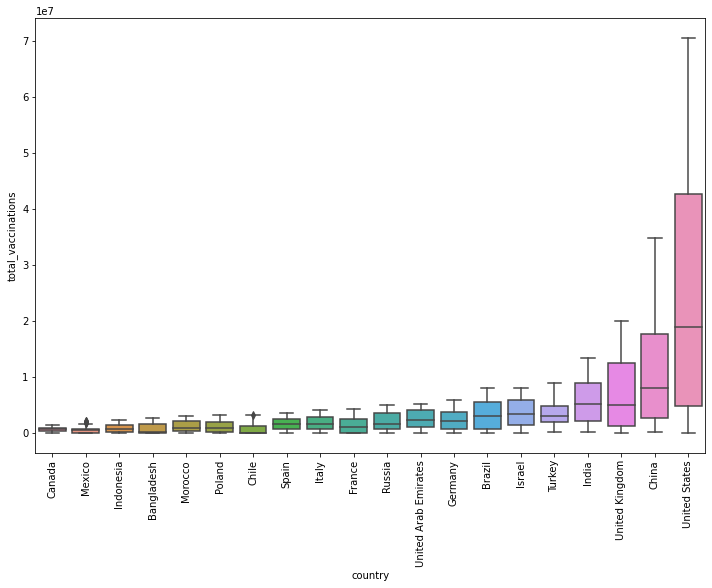

In [27]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='country', y='total_vaccinations', data=v_subset)
plt.xticks(rotation='vertical')
plt.ylabel('total_vaccinations')
plt.xlabel('country');

There is very little overlapping time-dependent data, for this project two different cleaned files generated to conduct further analysis and identify predictive models: the first file, vaccination data, the second, covid case data. It is a country wide comparison for the 20 countries that are grapphed above. The covid cases can be found by country in the different cvs files: 

    Africa: Morocco
    Asia: Indonesia, Bangladesh, United Arab Emirates, Germany, Israel, Turkey, India, China
    Europe: Poland, Spain, Italy, France, Russia, United Kingdom
    North America: USA, Canada
    South America: Mexico, Chile, Brazil


In [51]:
#the supplied CSV file is in the raw_data directory and was uploaded from kaggle: 
#https://www.kaggle.com/okwirjulius/covid19-cases-in-africa 
#Not all of the files that were downloaded will be used for this study, the following files were not included: 
#covid19_oceania.csv, covid19_others.csv, covid19_world.csv, and covid19_tests.csv

# get data file names
path =r'..\raw_data\covid_case_files'
filenames = glob.glob(path + "/*.csv")
def concat_dfs(filnames):
    dfs = []
    for filename in filenames:
        dfs.append(pd.read_csv(filename))
    la_frame = pd.concat(dfs, ignore_index=True)
    
    return la_frame

# Concatenate all data into one DataFrame
big_frame = concat_dfs(filenames)

#Update column names 
rec_cases = big_frame.rename(columns={'ObservationDate':'date','Country_Region':'country'})
rec_cases = rec_cases.drop(columns=['Province_State'])
rec_cases.columns = rec_cases.columns.str.lower()
rec_cases

,date,country,confirmed,deaths,recovered,active
0,2020-01-22,China,1,0.0,0.0,0.0
1,2020-01-22,China,14,0.0,0.0,0.0
2,2020-01-22,China,6,0.0,0.0,0.0
3,2020-01-22,China,1,0.0,0.0,0.0
4,2020-01-22,China,0,0.0,0.0,0.0
...,...,...,...,...,...,...
1038267,2020-12-31,Saint Vincent and the Grenadines,121,0.0,98.0,23.0
1038268,2020-12-31,Suriname,6210,122.0,5731.0,357.0
1038269,2020-12-31,Trinidad and Tobago,7150,127.0,6650.0,373.0
1038270,2020-12-31,Uruguay,19119,181.0,13468.0,5470.0


The following csv files were loaded into the big_fram: Asia, Europe, North America, South America. The African data has different column labels and can be concatenated after changing the labels.

In [53]:
#Load dataframe and update column names 
africa_df = pd.read_csv('../raw_data/covid19_africa.csv')
africa_df = africa_df.rename(columns={'ObservationDate':'date'}).drop(columns=['Region'])
africa_df.columns = africa_df.columns.str.lower()
morocco_cases = africa_df.loc[africa_df.loc['country'] == 'Canada']
#len(africa_df['country'])

,date,country,confirmed,deaths,recovered,active
0,2020-01-27,Ivory Coast,1,0,0,1
1,2020-02-14,Egypt,1,0,0,1
2,2020-02-15,Egypt,1,0,0,1
3,2020-02-16,Egypt,1,0,0,1
4,2020-02-17,Egypt,1,0,0,1
...,...,...,...,...,...,...
15450,2020-12-31,Togo,3633,68,3393,172
15451,2020-12-31,Tunisia,139140,4676,105364,29100
15452,2020-12-31,Uganda,35216,251,11733,23232
15453,2020-12-31,Zambia,20725,388,18660,1677


In [86]:
#Concatonating africa data with the other countries 
covid_cases = grab_countries(pd.concat([africa_df, rec_cases], axis=0))

#Updating the date datatype
covid_cases['date'] = pd.to_datetime(covid_cases['date'],format='%Y-%m-%d')

#Grouping by the date and including the countries
grouped_cases = covid_cases.groupby([covid_cases['date'].dt.date, 'country']).agg('sum')
grouped_cases = grouped_cases.sort_values(['country','date']).reset_index()
grouped_cases.head(50)

,date,country,confirmed,deaths,recovered,active
0,2020-03-08,Bangladesh,6,0.0,0.0,6.0
1,2020-03-10,Bangladesh,9,0.0,0.0,9.0
2,2020-03-11,Bangladesh,3,0.0,0.0,3.0
3,2020-03-13,Bangladesh,3,0.0,0.0,3.0
4,2020-03-15,Bangladesh,5,0.0,0.0,5.0
5,2020-03-16,Bangladesh,8,0.0,2.0,6.0
6,2020-03-17,Bangladesh,10,0.0,3.0,7.0
7,2020-03-18,Bangladesh,14,1.0,3.0,10.0
8,2020-03-19,Bangladesh,17,1.0,3.0,13.0
9,2020-03-20,Bangladesh,20,1.0,3.0,16.0
